# TUGAS 01 - Computer Vision
## I. Pengantar
### Latar Belakang
Di masa pandemi, pemerintah sangat menekankan masyarakat untuk mematuhi prinsip 5M, yaitu: Memakai masker, Mencuci tangan, Menjaga jarak, Menjauhi kerumunan, dan Membatasi mobilitas. Untuk mengurangi penyebaran kasus COVID-19, CIT menerapkan protokol dalam kegiatan belajar mengajar yang salaah satunya adalah penggunaan masker. Oleh karena itu AI engineer diminta untuk membuat suatu model yang dapat mengklasifikasikan seseorang menggunakan masker atau tidak berdasarkan data foto dari https://www.kaggle.com/omkargurav/face-mask-dataset.

### Tujuan
- Membuat model convolutional neural network yang dapat membedakan seseorang sedang memakai masker atau tidak
- Menentukan parameter yang dirasa paling penting dalam model dan berapa lama waktu yang diperlukan untuk melatih model 
- Mencari cara  meningkatkan akurasi model dan epoch yang paling optimal untuk model.

## II. Langkah Pengerjaan

In [ ]:
# Mengambil library yang diperlukan untuk menyelesaikan masalah
from keras.losses import SparseCategoricalCrossentropy
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras import callbacks
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
import os

In [ ]:
# Mendefinisikan fungsi get_data untuk mengambil data yang akan dilatih
def get_data(DIRECTORY, CATEGORIES):
    images = []
    labels = []
    for category in CATEGORIES:
        path = os.path.join(DIRECTORY, category)
        classes = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
            img_array = cv2.resize(img_array, (32,32))
            images.append(img_array)
            labels.append(classes)
    return images, labels

In [ ]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "data.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

file_name = "Foto Training Computer Vision UAS.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Extracting all the files now...
Done!
Extracting all the files now...
Done!


In [ ]:
train_dir = "data"
val_dir = "Foto Training Computer Vision UAS"
categories = ["without_mask", "with_mask"]

train_images, train_labels = get_data(train_dir, categories)
train_images, train_labels = shuffle(train_images, train_labels, random_state=0)
train_images = np.array(train_images) / 255.0
train_labels = np.array(train_labels)

val_images, val_labels = get_data(val_dir, categories)
val_images = np.array(val_images) / 255.0
val_labels = np.array(val_labels)

In [ ]:
train_images.shape

(7553, 32, 32)

In [ ]:
val_images.shape

(23, 32, 32)

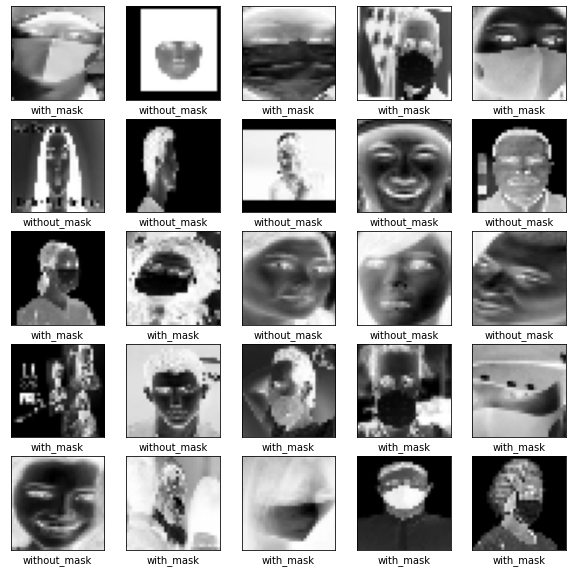

In [ ]:
# Menampilkan 25 data pertama dari dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(categories[train_labels[i]])
plt.show()

In [ ]:
train_images = train_images.reshape((train_images.shape[0], 32, 32,1))
val_images = val_images.reshape((val_images.shape[0], 32, 32,1))

In [ ]:
# Membuat model CNN 

model = Sequential([
    Conv2D(64,(3,3),input_shape=(32, 32, 1),activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dense(2,activation='softmax'),
])
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
# Membuat fungsi early stopping
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# es = callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)

In [ ]:
# Membuat Checkpoint
mc = callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
# mc = callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# Melakukan pelatihan model CNN yang dibuat

start_time =  time.time()
history = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=100, batch_size=100, callbacks=[es,mc])

print("waktu yang diperlukan untuk melatih model adalah", time.time() - start_time, "s")

Epoch 1/100
76/76 [==============================] - 2s 13ms/step - loss: 0.6743 - accuracy: 0.5690 - val_loss: 0.7254 - val_accuracy: 0.4783

Epoch 00001: val_loss improved from inf to 0.72545, saving model to best_model.h5
Epoch 2/100
76/76 [==============================] - 1s 8ms/step - loss: 0.4626 - accuracy: 0.7918 - val_loss: 0.7191 - val_accuracy: 0.6522

Epoch 00002: val_loss improved from 0.72545 to 0.71909, saving model to best_model.h5
Epoch 3/100
76/76 [==============================] - 1s 8ms/step - loss: 0.3291 - accuracy: 0.8592 - val_loss: 0.6380 - val_accuracy: 0.7391

Epoch 00003: val_loss improved from 0.71909 to 0.63799, saving model to best_model.h5
Epoch 4/100
76/76 [==============================] - 1s 8ms/step - loss: 0.2995 - accuracy: 0.8743 - val_loss: 0.5535 - val_accuracy: 0.6957

Epoch 00004: val_loss improved from 0.63799 to 0.55351, saving model to best_model.h5
Epoch 5/100
76/76 [==============================] - 1s 8ms/step - loss: 0.2338 - accuracy:

In [ ]:
from keras import models
# load the saved model
model = models.load_model('best_model.h5')
predictions = model.predict(val_images)

In [ ]:
predictions

array([[9.6934533e-01, 3.0654611e-02],
       [9.9327892e-01, 6.7211301e-03],
       [9.9838459e-01, 1.6153689e-03],
       [9.3396276e-01, 6.6037223e-02],
       [9.9981183e-01, 1.8823790e-04],
       [9.9964559e-01, 3.5440037e-04],
       [9.8523617e-01, 1.4763835e-02],
       [9.9902344e-01, 9.7659463e-04],
       [9.9349135e-01, 6.5085967e-03],
       [9.9988961e-01, 1.1036948e-04],
       [9.8415273e-01, 1.5847271e-02],
       [7.7364955e-04, 9.9922633e-01],
       [2.0583803e-03, 9.9794155e-01],
       [2.6165986e-02, 9.7383398e-01],
       [1.0124590e-03, 9.9898750e-01],
       [2.0323388e-02, 9.7967654e-01],
       [1.8924352e-04, 9.9981076e-01],
       [2.9746947e-05, 9.9997020e-01],
       [2.9101565e-07, 9.9999976e-01],
       [4.9952150e-04, 9.9950051e-01],
       [4.7789854e-05, 9.9995220e-01],
       [1.1915297e-03, 9.9880850e-01],
       [3.2782733e-01, 6.7217273e-01]], dtype=float32)

In [ ]:
# Fungsi yang digunakan untuk melakukan visualisasi hasil percobaan

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel(f"{categories[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({categories[int(true_label)]})", 
              color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, int(true_label[i])
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
val_images2 = val_images.reshape((val_images.shape[0], 32, 32))

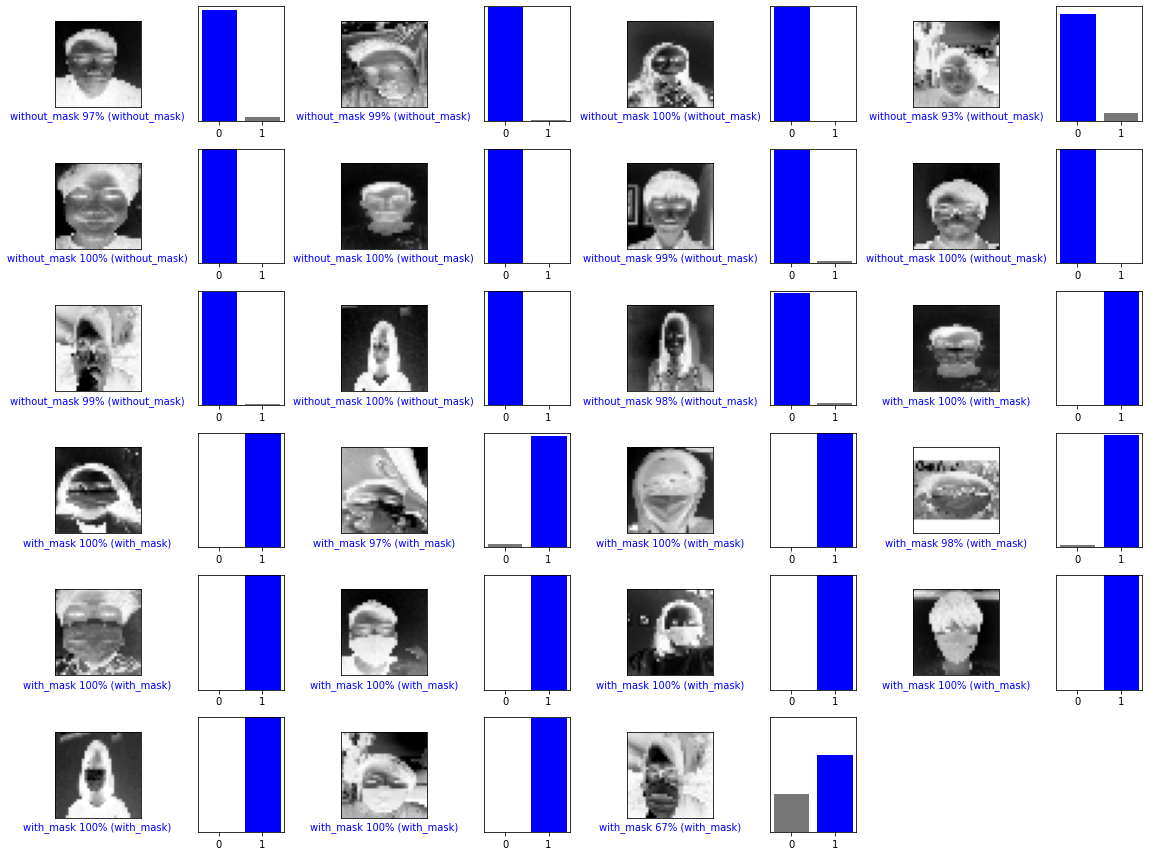

In [ ]:
# Visualisasi hasil prediksi/tebakan dari model yang dibuat

num_rows = 6
num_cols = 4
num_images = len(val_images2)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], val_labels, val_images2)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], val_labels)
plt.tight_layout()
plt.show()

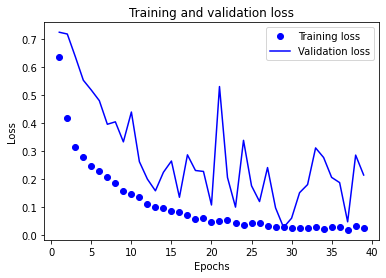

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

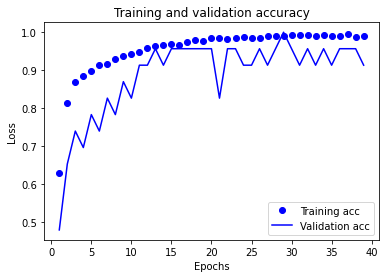

In [ ]:
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
pred = model.predict_classes(val_images)

from sklearn.metrics import confusion_matrix
confusion_matrix(val_labels, pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[11,  0],
       [ 0, 12]])

## III. Laporan & Analisis
### Analisa confusion matrix, jumlah epoch yang optimal, dan cara yang bisa dilakukan untuk meningkatkan akurasi model 
Confusion matriks menunjukkan bahwa model berhasil mengklasifikasikan semua gambar dengan benar, 10 gambar yang memakai masker dan 9 yang tidak memakai masker. Parameter confusion matriks yang harus diminamiilisir adalah false positive, dimana seseorang yang tidak menggunakan masker dikategorikan menggunakan masker. Sedangkan parameter confusion matriks yang perlu diperhatikan dalam kasus deteksi masker ini adalah true negative, yaitu seberapa banyak model mengklasifikasikan gambar murid yang tidak menggunakan masker dengan tepat. Hal ini dikarenakan model dibuat untuk mencari murid yang tidak mengikuti protokol kesehatan agar dapat ditindak lanjuti.

Jumlah epoch paling optimal yang kami temukan berada pada epoch ke 29, dengan loss pada data latih sebesar 0.0254 dan accuracy sebesar 0.9918. Untuk akurasi pada data validasi bisa mencapai nilai sempurna dengan loss sebesar 0.0260.

Untuk bisa meningkatkan akurasi model, kami menemukan bahwa layer Dropout sangat diperlukan untuk mencegah overfitting pada model. Selain itu, penambahan layer konvolusi dan pooling menjadi 3 layer juga meningkatkan akurasi model baik pada data latih maupun data validasi.

### Kendala yang dihadapi:
- Cara mengambil dan mengolah data awal yang merupakan folder berisi image menjadi array yang berisi angka. 
- <del>Kami menggunakan platform datalore agar dapat kolaborasi secara real time. Namun, karena kami menggunakan versi gratis, maka kami tidak mendapatkan akses GPU sehingga proses pelatihan kami berjalan agak lama.</del> (Kami telah mencoba menggunakan Google Collab dan mendapati waktu yang dibutuhkam jauh lebih singkat)
- Keputusan dalam pembuatan model dan penentuan jumlah epochs supaya hasilnya tidak underfiting maupun overfiting.